In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

584

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | mar del plata
Processing record 2 of Set 1 | saint-philippe
Processing record 3 of Set 1 | beloha
Processing record 4 of Set 1 | albany
Processing record 5 of Set 1 | ixtapa
Processing record 6 of Set 1 | puerto ayora
Processing record 7 of Set 1 | ushuaia
Processing record 8 of Set 1 | grand gaube
Processing record 9 of Set 1 | busselton
Processing record 10 of Set 1 | san pedro
Processing record 11 of Set 1 | vaini
Processing record 12 of Set 1 | merauke
Processing record 13 of Set 1 | bredasdorp
Processing record 14 of Set 1 | mataura
Processing record 15 of Set 1 | jiangyou
Processing record 16 of Set 1 | torbay
Processing record 17 of Set 1 | toyooka
Processing record 18 of Set 1 | port elizabeth
Processing record 19 of Set 1 | new norfolk
Processing record 20 of Set 1 | clyde river
Processing record 21 of Set 1 | litovko
Processing record 22 of Set 1 | victoria
Processing record 23 of Set 1

Processing record 41 of Set 4 | hirara
Processing record 42 of Set 4 | plavinas
Processing record 43 of Set 4 | ancud
Processing record 44 of Set 4 | umzimvubu
City not found. Skipping...
Processing record 45 of Set 4 | colares
Processing record 46 of Set 4 | viedma
Processing record 47 of Set 4 | watsa
Processing record 48 of Set 4 | itupiranga
Processing record 49 of Set 4 | dunedin
Processing record 50 of Set 4 | high rock
Processing record 1 of Set 5 | kaeo
Processing record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing record 3 of Set 5 | mitu
Processing record 4 of Set 5 | marcona
City not found. Skipping...
Processing record 5 of Set 5 | palmer
Processing record 6 of Set 5 | labuhan
Processing record 7 of Set 5 | pecos
Processing record 8 of Set 5 | bhag
Processing record 9 of Set 5 | mackay
Processing record 10 of Set 5 | kargil
Processing record 11 of Set 5 | khalkhal
Processing record 12 of Set 5 | naze
Processing record 13 of Set 5 | visnes
Processing rec

Processing record 28 of Set 8 | grand-santi
Processing record 29 of Set 8 | barentsburg
City not found. Skipping...
Processing record 30 of Set 8 | gibara
Processing record 31 of Set 8 | la tuque
Processing record 32 of Set 8 | collie
Processing record 33 of Set 8 | coihaique
Processing record 34 of Set 8 | benguela
Processing record 35 of Set 8 | saint albans
Processing record 36 of Set 8 | cabo san lucas
Processing record 37 of Set 8 | kingsville
Processing record 38 of Set 8 | lasa
Processing record 39 of Set 8 | moerai
Processing record 40 of Set 8 | karratha
Processing record 41 of Set 8 | ayagoz
Processing record 42 of Set 8 | conceicao das alagoas
Processing record 43 of Set 8 | caruray
Processing record 44 of Set 8 | touros
Processing record 45 of Set 8 | waingapu
Processing record 46 of Set 8 | bethel
Processing record 47 of Set 8 | pankovka
Processing record 48 of Set 8 | zhezkazgan
Processing record 49 of Set 8 | vondrozo
Processing record 50 of Set 8 | general roca
Processi

Processing record 15 of Set 12 | segou
Processing record 16 of Set 12 | ilo
Processing record 17 of Set 12 | nouakchott
Processing record 18 of Set 12 | shingu
Processing record 19 of Set 12 | la reforma
Processing record 20 of Set 12 | kjollefjord
Processing record 21 of Set 12 | sabla
Processing record 22 of Set 12 | barreirinhas
Processing record 23 of Set 12 | fenyi
Processing record 24 of Set 12 | berkovica
Processing record 25 of Set 12 | louisbourg
City not found. Skipping...
Processing record 26 of Set 12 | poros
Processing record 27 of Set 12 | krasnoselkup
Processing record 28 of Set 12 | tilichiki
Processing record 29 of Set 12 | cedar city
Processing record 30 of Set 12 | andros town
Processing record 31 of Set 12 | adana
Processing record 32 of Set 12 | sale
Processing record 33 of Set 12 | mugur-aksy
Processing record 34 of Set 12 | santa isabel do rio negro
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
len(city_data)

540

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,59.09,70,20,5.01,AR,21-11-23 01:32:11
1,Saint-Philippe,-21.3585,55.7679,72.99,75,24,8.39,RE,21-11-23 01:30:44
2,Beloha,-25.1667,45.0500,65.73,98,56,6.76,MG,21-11-23 01:32:11
3,Albany,42.6001,-73.9662,34.09,70,13,8.48,US,21-11-23 01:30:09
4,Ixtapa,20.7000,-105.2000,79.83,74,40,5.75,MX,21-11-23 01:32:12
5,Puerto Ayora,-0.7393,-90.3518,68.38,75,35,8.34,EC,21-11-23 01:32:12
6,Ushuaia,-54.8000,-68.3000,38.86,70,75,18.41,AR,21-11-23 01:32:13
7,Grand Gaube,-20.0064,57.6608,74.37,68,0,3.00,MU,21-11-23 01:32:13
8,Busselton,-33.6500,115.3333,64.04,47,0,3.83,AU,21-11-23 01:27:40
9,San Pedro,14.3500,121.0167,85.23,77,40,2.30,PH,21-11-23 01:32:14


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,21-11-23 01:32:11,-38.0023,-57.5575,59.09,70,20,5.01
1,Saint-Philippe,RE,21-11-23 01:30:44,-21.3585,55.7679,72.99,75,24,8.39
2,Beloha,MG,21-11-23 01:32:11,-25.1667,45.0500,65.73,98,56,6.76
3,Albany,US,21-11-23 01:30:09,42.6001,-73.9662,34.09,70,13,8.48
4,Ixtapa,MX,21-11-23 01:32:12,20.7000,-105.2000,79.83,74,40,5.75
5,Puerto Ayora,EC,21-11-23 01:32:12,-0.7393,-90.3518,68.38,75,35,8.34
6,Ushuaia,AR,21-11-23 01:32:13,-54.8000,-68.3000,38.86,70,75,18.41
7,Grand Gaube,MU,21-11-23 01:32:13,-20.0064,57.6608,74.37,68,0,3.00
8,Busselton,AU,21-11-23 01:27:40,-33.6500,115.3333,64.04,47,0,3.83
9,San Pedro,PH,21-11-23 01:32:14,14.3500,121.0167,85.23,77,40,2.30


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

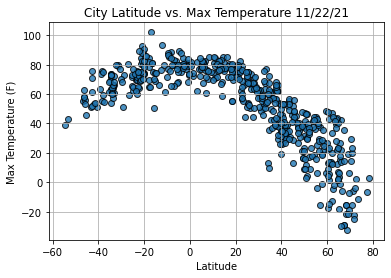

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

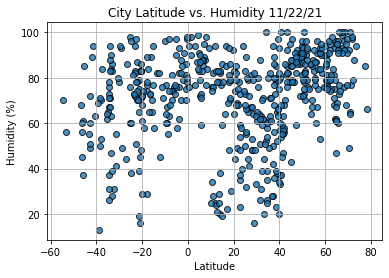

In [20]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

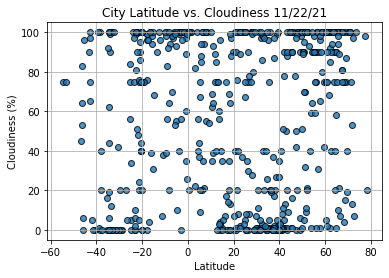

In [21]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

In [ ]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Sp (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()